In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import threading
from google.colab import output
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Uploading the source data into a DF
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project_1_python.csv")

In [ ]:
# CHECKING THE INPUT DATA:

# df.head()
# df.shape # returns 180 447 rows and 24 columns
# df.info() # column date to_date.time data type
# df["date"] # current format of the date: 2020-02-24 (year-month-date)
  #  df.isnull().sum() #summing up the null values in each column - no null values in columns (index, iso_code, continent,
  # location, date, population, latitude, longitude)
  # other columns contain several null values
df.columns


Index(['index', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'hosp_patients',
       'total_tests', 'new_tests', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'population', 'median_age', 'gdp_per_capita',
       'life_expectancy', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
df.tail()

index iso_code continent  location        date  total_cases  \
180472  190608      ZWE    Africa  Zimbabwe  2022-06-14     254155.0   
180473  190609      ZWE    Africa  Zimbabwe  2022-06-15     254387.0   
180474  190610      ZWE    Africa  Zimbabwe  2022-06-16     254502.0   
180475  190611      ZWE    Africa  Zimbabwe  2022-06-17     254753.0   
180476  190612      ZWE    Africa  Zimbabwe  2022-06-18     254753.0   

        new_cases  total_deaths  new_deaths  hosp_patients  ...  \
180472        0.0        5521.0         0.0            NaN  ...   
180473      232.0        5525.0         4.0            NaN  ...   
180474      115.0        5526.0         1.0            NaN  ...   
180475      251.0        5533.0         7.0            NaN  ...   
180476        NaN        5533.0         0.0            NaN  ...   

        people_vaccinated  people_fully_vaccinated  total_boosters  \
180472          6270096.0                4563366.0       1026048.0   
180473          6271703.0                4567466.0       1027822.0   
180474          6274305.0                4570349.0       1029463.0   
180475          6276402.0                4574222.0       1031790.0   
180476                NaN                      NaN             NaN   

        new_vaccinations  population  median_age  gdp_per_capita  \
180472               NaN  15092171.0        19.6        1899.775   
180473            7481.0  15092171.0        19.6        1899.775   
180474            7126.0  15092171.0        19.6        1899.775   
180475            8297.0  15092171.0        19.6        1899.775   
180476               NaN  15092171.0        19.6        1899.775   

        life_expectancy  latitude  longitude  
180472            61.49     -20.0       30.0  
180473            61.49     -20.0       30.0  
180474            61.49     -20.0       30.0  
180475            61.49     -20.0       30.0  
180476            61.49     -20.0       30.0  

[5 rows x 24 columns]

In [ ]:
# Converting date column to_datetime

df["date"] = pd.to_datetime(df["date"], errors = "coerce")
# df["date_new_format"] = df["date"].dt.strftime("%d-%m-%Y") #creating a new column with a different date format

In [ ]:
# Filtering DF for top 10 countries by population
top_10_df = df.groupby("location").mean(numeric_only=True).sort_values(by = "population", ascending = False).head(10)
top_10_df

index   total_cases     new_cases   total_deaths  \
location                                                             
China           35600.0  1.559778e+05   1012.186073    4442.213879   
India           77497.0  1.997589e+07  49709.175660  271421.393976   
United States  179829.0  3.208115e+07  98212.962415  513974.302021   
Indonesia       78352.0  2.358870e+06   7231.117998   70350.973494   
Pakistan       127563.0  7.879087e+05   1812.996450   17271.582017   
Brazil          23056.5  1.413865e+07  37552.666269  372230.577670   
Nigeria        122697.5  1.407370e+05    305.116528    1919.232274   
Bangladesh      13079.0  9.308757e+05   2347.816327   14998.995140   
Russia         138462.0  5.964633e+06  20835.144828  146416.423358   
Mexico         107628.5  2.482189e+06   6976.157330  187313.021898   

                new_deaths  hosp_patients   total_tests     new_tests  \
location                                                                
China             4.484571            NaN  3.154667e+09           NaN   
India           624.978261            NaN  3.623541e+08  1.059751e+06   
United States  1206.408333   53282.616809  4.054233e+08  1.085232e+06   
Indonesia       188.775904            NaN  2.732192e+07  1.396449e+05   
Pakistan         36.917375            NaN  1.066150e+07  3.495379e+04   
Brazil          816.576313            NaN  3.419218e+07  1.396434e+05   
Nigeria           3.859069            NaN  1.122555e+06  4.333673e+03   
Bangladesh       35.396112            NaN  5.799280e+06  1.873045e+04   
Russia          453.414842            NaN  9.982714e+07  3.319485e+05   
Mexico          389.589963            NaN  6.323994e+06  1.729950e+04   

               tests_per_case  total_vaccinations  people_vaccinated  \
location                                                               
China           332643.946462        2.104223e+09       1.234261e+09   
India               59.649877        9.287350e+08       5.599199e+08   
United States       16.830266        3.664555e+08       1.826903e+08   
Indonesia          162.039452        1.550902e+08       9.826860e+07   
Pakistan            47.116749        1.290639e+08       7.985020e+07   
Brazil                    NaN        2.178936e+08       1.131342e+08   
Nigeria            128.123641        8.759552e+06       6.086570e+06   
Bangladesh          20.849937        7.386575e+07       4.194602e+07   
Russia              39.300490        9.047921e+07       4.645838e+07   
Mexico               5.154350        7.695236e+07       4.448263e+07   

               people_fully_vaccinated  total_boosters  new_vaccinations  \
location                                                                   
China                     1.169022e+09    5.548253e+08      7.315764e+06   
India                     3.841330e+08    2.258872e+07      3.835777e+06   
United States             1.534101e+08    3.904476e+07      1.078752e+06   
Indonesia                 7.061944e+07    2.453823e+07      8.081779e+05   
Pakistan                  6.936796e+07    7.049484e+06      6.977271e+05   
Brazil                    8.675754e+07    4.420369e+07      9.021386e+05   
Nigeria                   4.350426e+06    9.041638e+05      6.449649e+04   
Bangladesh                3.491692e+07    8.642196e+06      7.260320e+05   
Russia                    3.990939e+07    8.043834e+06      4.247248e+05   
Mexico                    3.525714e+07    4.860751e+07      4.445507e+05   

                 population  median_age  gdp_per_capita  life_expectancy  \
location                                                                   
China          1.444216e+09        38.7       15308.712            76.91   
India          1.393409e+09        28.2        6426.674            69.66   
United States  3.329151e+08        38.3       54225.446            78.86   
Indonesia      2.763618e+08        29.3       11188.744            71.72   
Pakistan       2.251999e+08        23.5        5034.708           

/tmp/ipython-input-31-2191560072.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



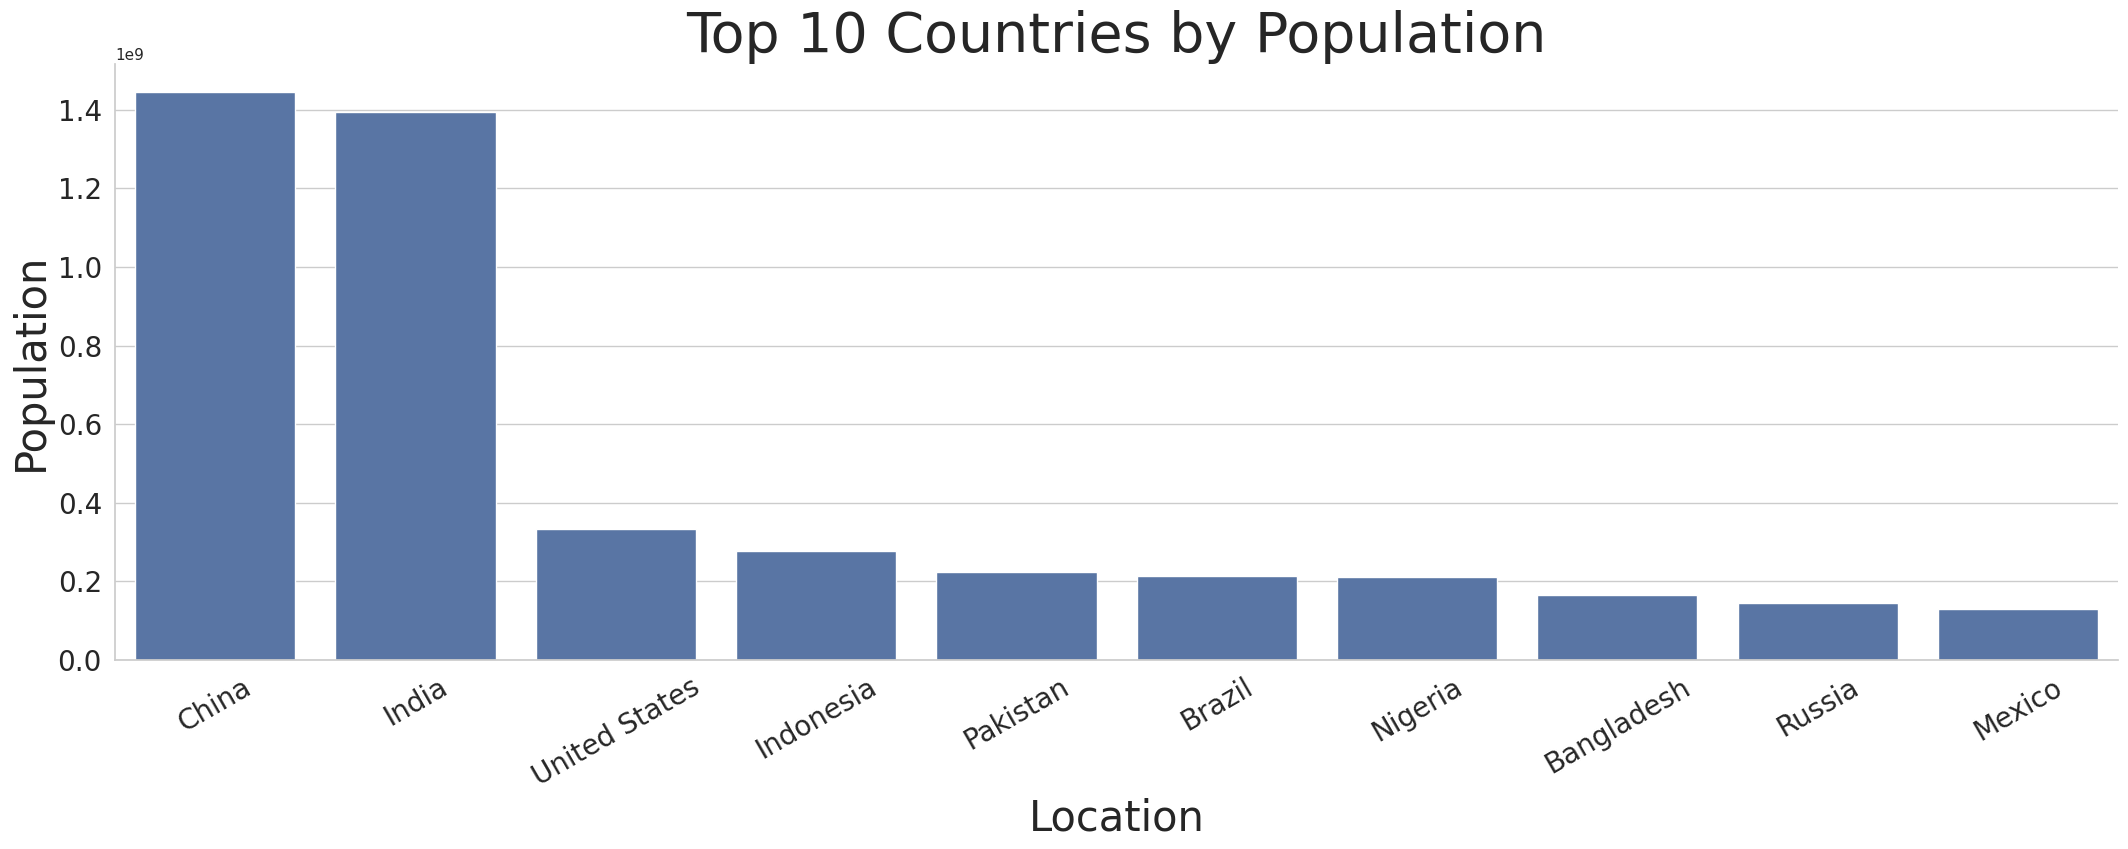

In [ ]:
# Visualization n°1 / SEABORN ### country with the largest population = China, country with the smallest population = Mexico in the top !0

chart1 = sns.catplot(
    data = top_10_df,
    x = "location",
    y = "population",
    kind = "bar",
    height = 7, # figure dimensions in inches
    aspect = 3,
    legend=False
);
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("notebook")

ax = chart1.ax

# Then set the tick labels with rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Increase font size of axis tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Increase font size of axis labels
ax.set_xlabel("Location", fontsize=30)
ax.set_ylabel("Population", fontsize=30)

# Introduce a chart title
chart1.ax.set_title("Top 10 Countries by Population", fontsize=40)


#plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# Visualization n°2 - PLOTLY

# rescaling population data for visualization purposes
df["size_scaled"] = np.interp(df["population"],
                              (df["population"].min(), df["population"].max()),
                              (2, 40))  # 5 = desired min size, 40 = max

fig = px.scatter(data_frame = df,
	x="population",
	y="life_expectancy",
	color="continent",
	hover_name="location",
	size="size_scaled",
	size_max=40,
	title="""Population vs Life Expectancy""",
  log_x=True,
  range_x=[700, (df["population"].max()+600000000)],
  color_discrete_sequence = px.colors.qualitative.Dark2,
  labels={
        "population": "Population",
        "life_expectancy": "Life Expectancy",
        "continent": "Continent"
    }
  )

fig.update_layout(
    title_font_size=30,          # Chart title
    title_x=0.5,  # Centering the title, 0 = left, 0.5 = center, 1 = right
    xaxis_title_font_size=25,    # X-axis label
    yaxis_title_font_size=25,    # Y-axis label
)

fig.show()


In [ ]:
# Visualization n°3 - Number of diagnosed COVID cases over time in Angola and Montenegro and Czechia

df_selected_countries = df[df["location"].isin(["Angola", "Montenegro", "Czechia"])]
start_date = df_selected_countries["date"].min() - pd.Timedelta(days=30)
end_date = df_selected_countries["date"].max() - pd.Timedelta(days=30)

fig = px.line(data_frame = df_selected_countries,
  x = "date",
  y = "new_cases",
  title = "Evolution of COVID-19 over time",
  color = "location",
  range_x=[start_date, end_date],
  color_discrete_sequence = ["#000000", "#1F77B4", "#FFA500"],
  markers = True,
  labels={
        "new_cases": "New Cases",
        "location": "Country"
    }
   )

fig.update_layout(
    title_font_size=30,          # Chart title
    title_x=0.5,  # Centering the title, 0 = left, 0.5 = center, 1 = right
    yaxis_title_font_size=20,
    xaxis_title = None
)

fig.show()

In [ ]:
pip install dash

In [ ]:
# Voluntary solution of vizualization n°3

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

available_countries = df['location'].unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("COVID-19 Evolution", style={'color': 'white'}),

    dcc.Dropdown(
        id='country_selector',
        options=[{'label': c, 'value': c} for c in available_countries],
        value=["France", "Czechia", "Angola", "China"],  # Show just a few countries by default
        multi=True
    ),

    dcc.Graph(id='covid_line_chart')
])

@app.callback(
    Output('covid_line_chart', 'figure'),
    Input('country_selector', 'value')
)
def update_figure(selected_countries):   # the function that updates the visualization needs to be directly behind the callback that it is connected to
    filtered_df = df[df['location'].isin(selected_countries)]
                                        # alternatively there can be more outputs in the callback connected to one input (=trigger), which is not always what we want
    fig = px.line(                      # otherwise u need to write a specific callback for each part of the visualization u want updated based on users input
        data_frame=filtered_df,
        x="date",
        y="new_cases",
        title="Evolution of COVID-19 over time",
        color="location",
        range_x=[start_date, end_date],
        color_discrete_sequence = px.colors.qualitative.Dark24,
        markers=True,
        labels={"new_cases": "New Cases", "location": "Country"}
    )

    fig.update_layout(
        title_font_size=30,
        title_x=0.5,
        yaxis_title_font_size=20,
        xaxis_title=None
    )

    return fig

thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)


<IPython.core.display.Javascript object>

In [ ]:
df[["location", "total_cases"]]

location  total_cases
0       Afghanistan          5.0
1       Afghanistan          5.0
2       Afghanistan          5.0
3       Afghanistan          5.0
4       Afghanistan          5.0
...             ...          ...
180472     Zimbabwe     254155.0
180473     Zimbabwe     254387.0
180474     Zimbabwe     254502.0
180475     Zimbabwe     254753.0
180476     Zimbabwe     254753.0

[180477 rows x 2 columns]

In [ ]:
# Visualization n°4 - COVID-19 map using SCATTER_GEO in plotly

df_total_cases = df.groupby("location").max().reset_index()
df_total_cases = df_total_cases.dropna(subset=["total_cases"])
df_total_cases["ratio"] = df_total_cases["total_cases"] / df_total_cases["population"]*100

# df_total_cases

fig = px.scatter_geo(df_total_cases,
  lat = "latitude",
  lon = "longitude",
  size = "ratio",
  size_max = 15,
  color = "continent", #this parameter uses a gradient scale color code based on how many cases there were
  color_discrete_sequence = px.colors.qualitative.Dark2,
  hover_name = "location",
  hover_data={
        "total_cases": False,
        "ratio": True,
        "gdp_per_capita": False,
        "population": False,
        "continent": False,
        "latitude": False,   # Hide lat/lon if not needed
        "longitude": False
    },
  projection = "equirectangular",
  title = "COVID-19 Incidence Map by Country"
  )

fig.update_layout(
        title_font_size=30,
        title_x=0.5
    )
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>" +
        "Total cases/population [%]: %{customdata[1]:,.2f}<br>"
    ),
    customdata=df_total_cases[["location", "ratio"]]
)
fig.show()

In [ ]:
# Visualization n°4 - COVID-19 map using CHOROPLETH in plotly

# Group and clean data
df_total_cases = df.groupby("iso_code").max().reset_index()
df_total_cases = df_total_cases.dropna(subset=["total_cases"])

# Compute total_cases as % of population
df_total_cases["ratio"] = df_total_cases["total_cases"] / df_total_cases["population"] * 100

# Build choropleth
fig = px.choropleth(
    df_total_cases,
    locations="iso_code",                       # Use ISO Alpha-3 codes for matching countries
    color="continent",                          # Color by continent (categorical)
    hover_name="location",                      # Bold title in tooltip
    hover_data={
        "total_cases": False,
        "ratio": True,
        "gdp_per_capita": False,
        "population": False,
        "continent": False
    },
    color_discrete_sequence=px.colors.qualitative.Dark2,
    projection="equirectangular",
    title="COVID-19 Incidence Map by Country"
)

# Customize layout and hover tooltip
fig.update_layout(
    title_font_size=30,
    title_x=0.5
)

# Custom hover tooltip formatting
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>" +
        "Total cases/population %: %{customdata[1]:,.2f}<br>"
    ),
    customdata=df_total_cases[["location", "ratio"]]
)

fig.show()

<IPython.core.display.Javascript object>

In [ ]:
# Dashboard # 1

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

available_countries = df['location'].unique()

app = dash.Dash(__name__)

app.layout = html.Div([    #vkladam seznam prvku do layoutu
    html.H1(id = "main-title", style={"color": "white"}), #depending on the filter
    html.H2("Choose what you want to see: new COVID-19 cases or deaths", style={"color": "white"}), # user should pick if he/she wants to see deaths or new cases in time
    dcc.Dropdown(
        id = "deaths_or_new_cases",
        options = [
        {"label": "New COVID-19 Cases", "value": "new_cases"},
        {"label": "New Deaths due to COVID-19", "value": "new_deaths"}
        ],
        value = "new_cases",
        multi = True
    ),
    html.H2("Select countries of interest", style={"color": "white"}),
    dcc.Dropdown(
        id = "country_selector",
        options = [{'label': c, 'value': c} for c in available_countries],
        value=["United States", "Czechia", "China"],  # Show just a few countries by default
        multi=True
        ),
    html.Div(id="cases_container", children=dcc.Graph(id="cases_evolution")),
    html.Div(id="deaths_container", children=dcc.Graph(id="deaths_evolution"))
    ]
)
@app.callback(
    Output("main-title", "children"),
    Input("country_selector", "value")
)
def update_title(location):
    return f"Cumulative number of COVID-19 positive cases in {location} over time"

@app.callback(
    Output("cases_container", "style"),
    Input("deaths_or_new_cases", "value")
)
def toggle_cases_visibility(selected_metrics):
    if "new_cases" in selected_metrics:
        return {"display": "block"}
    return {"display": "none"}

@app.callback(
    Output("deaths_container", "style"),
    Input("deaths_or_new_cases", "value")
)
def toggle_deaths_visibility(selected_metrics):
    if "new_deaths" in selected_metrics:
        return {"display": "block"}
    return {"display": "none"}

@app.callback(
    Output("cases_evolution", "figure"),
    [Input("deaths_or_new_cases", "value"),
     Input("country_selector", "value")]
)
def update_new_cases_figure(selected_metrics, selected_countries):
  filtered_df = df[df["location"].isin(selected_countries)]

  fig = px.line(                      # otherwise u need to write a specific callback for each part of the visualization u want updated based on users input
        data_frame=filtered_df,
        x="date",
        y="new_cases",
        title="Evolution of COVID-19 onset over time",
        color="location",
        color_discrete_sequence = px.colors.qualitative.Dark24,
        labels={"new_cases": "New Cases", "location": "Country"}
    )

  fig.update_layout(
        title_font_size=30,
        title_x=0.5,
        yaxis_title_font_size=20,
        xaxis_title=None
    )

  return fig

@app.callback(
    Output("deaths_evolution", "figure"),
    [Input("deaths_or_new_cases", "value"),
     Input("country_selector", "value")]
)

def update_deaths_figure(selected_metrics, selected_countries):
  filtered_df = df[df["location"].isin(selected_countries)]

  fig = px.line(
        data_frame=filtered_df,
        x="date",
        y="new_deaths",
        title="Onset of deaths caused by COVID-19 over time",
        color="location",
        color_discrete_sequence = px.colors.qualitative.Dark24,
        labels={"new_deaths": "New Deaths today", "location": "Country"}
    )

  fig.update_layout(
        title_font_size=30,
        title_x=0.5,
        yaxis_title_font_size=20,
        xaxis_title=None
    )

  return fig

In [ ]:
thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)

<IPython.core.display.Javascript object>

In [ ]:
import subprocess #trying to open the dash application in a new tab/window (it doesnt really work for me)

def open_browser():
    subprocess.Popen(
        ["C:\Program Files\Google\Chrome\Application\chrome.exe", '--new-tab', 'http://127.0.0.1:8050']
    )

In [ ]:
 # Dashboard # 2

available_continents = df["continent"].unique()

continent_centers = {
    "Europe": {"lat": 54.5260, "lon": 15.2551, "scale": 3},
    "Asia": {"lat": 34.0479, "lon": 100.6197, "scale": 2},
    "North America": {"lat": 54.5260, "lon": -105.2551, "scale": 2},
    "South America": {"lat": -8.7832, "lon": -55.4915, "scale": 2.5},
    "Africa": {"lat": 1.6508, "lon": 17.6874, "scale": 1.5},
    "Oceania": {"lat": -22.7359, "lon": 140.0188, "scale": 3},
    "Antarctica": {"lat": -82.8628, "lon": 135.0000, "scale": 5}
}

def get_map_center_and_scale(selected_continents):
    if not selected_continents:
        # Default to world view
        return {"lat": 0, "lon": 0, "scale": 1}
    if isinstance(selected_continents, str):
        selected_continents = [selected_continents]

    lats = []
    lons = []
    scales = []

    for cont in selected_continents:
        center = continent_centers.get(cont)
        if center:
            lats.append(center["lat"])
            lons.append(center["lon"])
            scales.append(center["scale"])

    if not lats or not lons:
        return {"lat": 0, "lon": 0, "scale": 1}

    avg_lat = sum(lats) / len(lats)
    avg_lon = sum(lons) / len(lons)
    avg_scale = min(scales)  # choose minimum scale to zoom out enough to see all continents

    return {"lat": avg_lat, "lon": avg_lon, "scale": avg_scale}

# columns needed for the other filter 'total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated',

app = dash.Dash(__name__)

app.layout = html.Div([    #vkladam seznam prvku do layoutu
    html.H1(id = "main-title", style={"color": "white"}), # depending on the filter
    html.H2("Pick the COVID-19 metrics of your interest", style={"color": "white"}), # user should pick if he/she wants to see deaths or new cases in time
    dcc.Dropdown(
        id = "metrics",
        options = [
        {"label": "Total COVID-19 Cases", "value": "total_cases"},
        {"label": "Total Deaths due to COVID-19", "value": "total_deaths"},
        {"label": "Total Tests", "value": "total_tests"},
        {"label": "Total Vaccinations", "value": "total_vaccinations"},
        {"label": "People Vaccinated", "value": "people_vaccinated"}
        ],
        value = "total_cases",
        multi = False
    ),
    html.H2("Select the continent of your choice", style={"color": "white"}),
    dcc.Dropdown(
        id = "continent_selector",
        options = [{'label': c, 'value': c} for c in available_continents],
        value=["Europe"],  # From the start show only a single continent
        multi=True
        ),
    dcc.Graph(id="map_chart"),
    ]
)
@app.callback(
    Output("main-title", "children"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_title(metric, continent):
    readable_metric = {
        "total_cases": "Total COVID-19 Cases",
        "total_deaths": "Total COVID-19 Deaths",
        "total_tests": "Total Tests Conducted",
        "total_vaccinations": "Total Vaccinations",
        "people_vaccinated": "People Vaccinated"
    }.get(metric, metric) #.get(key, default) is a python f-ce one can call on a dictionary. It looks for the key in the dictionary (first parameter)
                          # and returns the value assigned to the key, if the key is not found in the dictionary, it returns the 2nd parameter in the braces
    if isinstance(continent, list): # isinstance checks if the 1st parameter is a list, if so the first line is executed (list converted into a single string)
        continents_text = ", ".join(continent)  #separated by commas
    else:                                        # it it is not a list it returns the variable continents - either a single string or none.
        continents_text = continent

    return f"{readable_metric} in {continents_text}"

@app.callback(
    Output("map_chart", "figure"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_chart(selected_metric, selected_continent):
    # rescaling population data for visualization purposes
    df["rescaled_metric"] = np.interp(df[selected_metric],
                              (df[selected_metric].min(), df[selected_metric].max()),
                              (2, 40))

    df_metrics = df.groupby("location").max().reset_index()
    df_metrics = df_metrics.dropna(subset=['total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated'])

    # Filter data
    filtered_df = df_metrics[df_metrics["continent"].isin(selected_continent)]

    # Format the metric nicely (e.g., 1,234.6)
    filtered_df["formatted_metric"] = filtered_df[selected_metric].apply(lambda x: f"{x:,.1f}")
    filtered_df["lat_str"] = filtered_df["latitude"].apply(lambda x: f"{x:.2f}")
    filtered_df["lon_str"] = filtered_df["longitude"].apply(lambda x: f"{x:.2f}")


    # Prepare customdata as a 2D array: each row corresponds to a point
    custom_data = filtered_df[["formatted_metric", "lat_str", "lon_str"]].values

    # Build figure
    fig = px.scatter_geo(
        filtered_df,
        lat="latitude",
        lon="longitude",
        size="rescaled_metric",
        size_max=23,
        color="location",
        color_discrete_sequence = px.colors.qualitative.Dark2,
        hover_name="location",
        hover_data = None,
        projection="equirectangular",
        title=f"COVID-19 {selected_metric.replace('_', ' ').title()} by Country",
        customdata=custom_data,
        text = 'location'
    )

    # Set custom hover template
    fig.update_traces(
    hovertemplate="""
    <b>%{text}</b><br>
    """ + selected_metric.replace('_', ' ').title() + """: %{customdata[0]}<br>
    Latitude: %{customdata[1]}<br>
    Longitude: %{customdata[2]}<br>
    <extra></extra>
    """
    )

    # Set map view center and zoom
    center = get_map_center_and_scale(selected_continent)
    fig.update_geos(
        showcountries=True, countrycolor="RebeccaPurple",
        showcoastlines=True, coastlinecolor="RebeccaPurple",
        projection_scale=center["scale"],
        center={"lat": center["lat"], "lon": center["lon"]}
    )

    # Layout tweaks
    fig.update_layout(
        title_font_size=30,
        title_x=0.5
    )

    return fig

<IPython.core.display.Javascript object>

In [ ]:
thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)

<IPython.core.display.Javascript object>

In [ ]:
# Dashboard #2 minimal functional version without the tooltip tweaks and customdata definition
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

available_continents = df["continent"].unique()

continent_centers = {
    "Europe": {"lat": 54.5260, "lon": 15.2551, "scale": 3},
    "Asia": {"lat": 34.0479, "lon": 100.6197, "scale": 2},
    "North America": {"lat": 54.5260, "lon": -105.2551, "scale": 2},
    "South America": {"lat": -8.7832, "lon": -55.4915, "scale": 2.5},
    "Africa": {"lat": 1.6508, "lon": 17.6874, "scale": 1.5},
    "Oceania": {"lat": -22.7359, "lon": 140.0188, "scale": 3},
    "Antarctica": {"lat": -82.8628, "lon": 135.0000, "scale": 5}
}

def get_map_center_and_scale(selected_continents):
    if not selected_continents:
        # Default to world view
        return {"lat": 0, "lon": 0, "scale": 1}
    if isinstance(selected_continents, str):
        selected_continents = [selected_continents]

    lats = []
    lons = []
    scales = []

    for cont in selected_continents:
        center = continent_centers.get(cont)
        if center:
            lats.append(center["lat"])
            lons.append(center["lon"])
            scales.append(center["scale"])

    if not lats or not lons:
        return {"lat": 0, "lon": 0, "scale": 1}

    avg_lat = sum(lats) / len(lats)
    avg_lon = sum(lons) / len(lons)
    avg_scale = min(scales)  # choose minimum scale to zoom out enough to see all continents

    return {"lat": avg_lat, "lon": avg_lon, "scale": avg_scale}

# columns needed for the other filter 'total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated',

app = dash.Dash(__name__)

app.layout = html.Div([    #vkladam seznam prvku do layoutu
    html.H1(id = "main-title", style={"color": "white"}), # depending on the filter
    html.H2("Pick the COVID-19 metrics of your interest", style={"color": "white"}), # user should pick if he/she wants to see deaths or new cases in time
    dcc.Dropdown(
        id = "metrics",
        options = [
        {"label": "Total COVID-19 Cases", "value": "total_cases"},
        {"label": "Total Deaths due to COVID-19", "value": "total_deaths"},
        {"label": "Total Tests", "value": "total_tests"},
        {"label": "Total Vaccinations", "value": "total_vaccinations"},
        {"label": "People Vaccinated", "value": "people_vaccinated"}
        ],
        value = "total_cases",
        multi = False
    ),
    html.H2("Select the continent of your choice", style={"color": "white"}),
    dcc.Dropdown(
        id = "continent_selector",
        options = [{'label': c, 'value': c} for c in available_continents],
        value=["Europe"],  # From the start show only a single continent
        multi=True
        ),
    dcc.Graph(id="map_chart"),
    ]
)
@app.callback(
    Output("main-title", "children"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_title(metric, continent):
    readable_metric = {
        "total_cases": "Total COVID-19 Cases",
        "total_deaths": "Total COVID-19 Deaths",
        "total_tests": "Total Tests Conducted",
        "total_vaccinations": "Total Vaccinations",
        "people_vaccinated": "People Vaccinated"
    }.get(metric, metric) #.get(key, default) is a python f-ce one can call on a dictionary. It looks for the key in the dictionary (first parameter)
                          # and returns the value assigned to the key, if the key is not found in the dictionary, it returns the 2nd parameter in the braces
    if isinstance(continent, list): # isinstance checks if the 1st parameter is a list, if so the first line is executed (list converted into a single string)
        continents_text = ", ".join(continent)  #separated by commas
    else:                                        # it it is not a list it returns the variable continents - either a single string or none.
        continents_text = continent

    return f"{readable_metric} in {continents_text}"

@app.callback(
    Output("map_chart", "figure"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_chart(selected_metric, selected_continent):
    # rescaling population data for visualization purposes
    df["rescaled_metric"] = np.interp(df[selected_metric],
                              (df[selected_metric].min(), df[selected_metric].max()),
                              (2, 40))

    df_metrics = df.groupby("location").max().reset_index()
    df_metrics = df_metrics.dropna(subset=['total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated'])

    # Filter data
    filtered_df = df_metrics[df_metrics["continent"].isin(selected_continent)]

    # Format the metric nicely (e.g., 1,234.6)
    filtered_df["formatted_metric"] = filtered_df[selected_metric].apply(lambda x: f"{x:,.1f}")
    filtered_df["lat_str"] = filtered_df["latitude"].apply(lambda x: f"{x:.2f}")
    filtered_df["lon_str"] = filtered_df["longitude"].apply(lambda x: f"{x:.2f}")

    # Build figure
    fig = px.scatter_geo(
        filtered_df,
        lat="latitude",
        lon="longitude",
        size="rescaled_metric",
        size_max=23,
        color="location",
        color_discrete_sequence = px.colors.qualitative.Dark2,
        hover_name="location",
        hover_data = {
        selected_metric: True,
        "location": False,
        "latitude": True,
        "longitude": True,
        "rescaled_metric": False
        },
        projection="equirectangular",
        title=f"COVID-19 {selected_metric.replace('_', ' ').title()} by Country"
    )

    # Set map view center and zoom
    center = get_map_center_and_scale(selected_continent)
    fig.update_geos(
        showcountries=True, countrycolor="RebeccaPurple",
        showcoastlines=True, coastlinecolor="RebeccaPurple",
        projection_scale=center["scale"],
        center={"lat": center["lat"], "lon": center["lon"]}
    )

    # Layout tweaks
    fig.update_layout(
        title_font_size=30,
        title_x=0.5
    )

    return fig

In [ ]:
thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)

<IPython.core.display.Javascript object>

In [ ]:
# Dashboard #2 corrected by Monika
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

available_continents = df["continent"].unique()

continent_centers = {
    "Europe": {"lat": 54.5260, "lon": 15.2551, "scale": 3},
    "Asia": {"lat": 34.0479, "lon": 100.6197, "scale": 2},
    "North America": {"lat": 54.5260, "lon": -105.2551, "scale": 2},
    "South America": {"lat": -8.7832, "lon": -55.4915, "scale": 2.5},
    "Africa": {"lat": 1.6508, "lon": 17.6874, "scale": 1.5},
    "Oceania": {"lat": -22.7359, "lon": 140.0188, "scale": 3},
    "Antarctica": {"lat": -82.8628, "lon": 135.0000, "scale": 5}
}

def get_map_center_and_scale(selected_continents):
    if not selected_continents:
        # Default to world view
        return {"lat": 0, "lon": 0, "scale": 1}
    if isinstance(selected_continents, str):
        selected_continents = [selected_continents]

    lats = []
    lons = []
    scales = []

    for cont in selected_continents:
        center = continent_centers.get(cont)
        if center:
            lats.append(center["lat"])
            lons.append(center["lon"])
            scales.append(center["scale"])

    if not lats or not lons:
        return {"lat": 0, "lon": 0, "scale": 1}

    avg_lat = sum(lats) / len(lats)
    avg_lon = sum(lons) / len(lons)
    avg_scale = min(scales)  # choose minimum scale to zoom out enough to see all continents

    return {"lat": avg_lat, "lon": avg_lon, "scale": avg_scale}

# columns needed for the other filter 'total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated',

app = dash.Dash(__name__)

app.layout = html.Div([    #vkladam seznam prvku do layoutu
    html.H1(id = "main-title", style={"color": "white"}), # depending on the filter
    html.H2("Pick the COVID-19 metrics of your interest", style={"color": "white"}), # user should pick if he/she wants to see deaths or new cases in time
    dcc.Dropdown(
        id = "metrics",
        options = [
        {"label": "Total COVID-19 Cases", "value": "total_cases"},
        {"label": "Total Deaths due to COVID-19", "value": "total_deaths"},
        {"label": "Total Tests", "value": "total_tests"},
        {"label": "Total Vaccinations", "value": "total_vaccinations"},
        {"label": "People Vaccinated", "value": "people_vaccinated"}
        ],
        value = "total_cases",
        multi = False
    ),
    html.H2("Select the continent of your choice", style={"color": "white"}),
    dcc.Dropdown(
        id = "continent_selector",
        options = [{'label': c, 'value': c} for c in available_continents],
        value=["Europe"],  # From the start show only a single continent
        multi=True
        ),
    dcc.Graph(id="map_chart"),
    ]
)
@app.callback(
    Output("main-title", "children"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_title(metric, continent):
    readable_metric = {
        "total_cases": "Total COVID-19 Cases",
        "total_deaths": "Total COVID-19 Deaths",
        "total_tests": "Total Tests Conducted",
        "total_vaccinations": "Total Vaccinations",
        "people_vaccinated": "People Vaccinated"
    }.get(metric, metric) #.get(key, default) is a python f-ce one can call on a dictionary. It looks for the key in the dictionary (first parameter)
                          # and returns the value assigned to the key, if the key is not found in the dictionary, it returns the 2nd parameter in the braces
    if isinstance(continent, list): # isinstance checks if the 1st parameter is a list, if so the first line is executed (list converted into a single string)
        continents_text = ", ".join(continent)  #separated by commas
    else:                                        # if it is not a list it returns the variable continents - either a single string or none.
        continents_text = continent

    return f"{readable_metric} in {continents_text}"

@app.callback(
    Output("map_chart", "figure"),
    [Input("metrics", "value"),
     Input("continent_selector", "value")]
)
def update_chart(selected_metric, selected_continent):
    # rescaling population data for visualization purposes
    df["rescaled_metric"] = np.interp(df[selected_metric],
                              (df[selected_metric].min(), df[selected_metric].max()),
                              (2, 40))

    df_metrics = df.groupby("location").max().reset_index()
    df_metrics = df_metrics.dropna(subset=['total_cases', 'total_vaccinations', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated'])

    # Filter data
    filtered_df = df_metrics[df_metrics["continent"].isin(selected_continent)]

    # Format the metric nicely (e.g., 1,234.6)
    filtered_df["formatted_metric"] = filtered_df[selected_metric].apply(lambda x: f"{x:,.1f}")
    filtered_df["lat_str"] = filtered_df["latitude"].apply(lambda x: f"{x:.2f}")
    filtered_df["lon_str"] = filtered_df["longitude"].apply(lambda x: f"{x:.2f}")

    # Build figure
    fig = px.scatter_mapbox(
      filtered_df,
      lat="latitude",
      lon="longitude",
      size="rescaled_metric",
      color="location",
      hover_name="location",
      hover_data={selected_metric:True},
      size_max=23,
      center={"lat": center["lat"], "lon": center["lon"]},
      zoom=center["scale"],
      title=f"COVID-19 {selected_metric.replace('_',' ').title()} by Country",
      color_discrete_sequence=px.colors.qualitative.Dark2
)

    # Set map view center and zoom
    center = get_map_center_and_scale(selected_continent)
    fig.update_geos(
        showcountries=True, countrycolor="RebeccaPurple",
        showcoastlines=True, coastlinecolor="RebeccaPurple",
        projection_scale=center["scale"],
        center={"lat": center["lat"], "lon": center["lon"]}
    )

    fig.update_layout(
        mapbox_style="carto-darkmatter",
        margin={"l":0,"r":0,"t":40,"b":0},
        title_font_size=30,
        title_x=0.5
)

    return fig

In [ ]:
thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)

<IPython.core.display.Javascript object>

In [ ]:
# Dashboard #3
import dash
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Output, Input
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Vaccinations during COVID-19", style={"color": "white"}),
    html.H2("Select for how many countries you want to see the results:", style={"color": "white"}),
    dcc.RadioItems(id = "country_range",
                   options = [{"label": str(i), "value": i} for i in [5, 10, 15, 20]],
                   value = 5,
                   inline = True,
                   style={"color": "white", "fontSize": "18px"},  # font color and size
                   labelStyle={"display": "inline-block", "margin-right": "20px"}),
    html.Br(),  # ← line break
    html.Div([
    dcc.Graph(id="total_vaccinations", style={"width": "50%", "display": "inline-block"}),
    dcc.Graph(id="vaccinations_related_to_country_population", style={"width": "50%", "display": "inline-block"})
    ], style={"display": "flex"})
])

@app.callback(
    [Output("total_vaccinations", "figure"),
     Output("vaccinations_related_to_country_population", "figure")],
    Input("country_range", "value")
)
def update_charts(selected_country_range):
  df_filtered = df.groupby("location").max().reset_index().dropna(subset=["total_vaccinations"]).sort_values(by = 'total_vaccinations', ascending = False).head(selected_country_range)
  df_filtered["ratio_vac"] = df_filtered["total_vaccinations"] / df_filtered["population"]*100

  if selected_country_range <= 10:
    text_labels = df_filtered["total_vaccinations"].map(lambda x: f"{x / 1e9:.1f}B")
    text_position = "outside"
  else:
    text_labels = None
    text_position = None

  fig1 = px.bar(df_filtered, x='location', y='total_vaccinations', title='Total Vaccinations per Country', text=text_labels) # only if selected_country_range >= 10
  fig1.update_layout(title_font=dict(size=28),
      xaxis_tickangle=-45,
      xaxis_title="Countries",
      xaxis_title_font=dict(size=20),
      yaxis_title="Total Number of Vaccinations",
      yaxis_title_font=dict(size=17)
      )

  if text_position:
    fig1.update_traces(textposition=text_position)

  if selected_country_range <= 10:
    text_labels2 = df_filtered["ratio_vac"].map(lambda x: f"{x:.1f}%")
    text_position2 = "outside"
  else:
    text_labels2 = None
    text_position2 = None

  fig2 = px.bar(df_filtered, x='location', y='ratio_vac', title='Total Vaccinations Realtive to Country Population', text=text_labels2)
  fig2.update_layout(title_font=dict(size=20),
      xaxis_tickangle=-45,
      xaxis_title="Countries",
      xaxis_title_font=dict(size=20),
      yaxis_title="Vaccinations as % of Population",
      yaxis_title_font=dict(size=17)
      )
  if text_position2:
    fig2.update_traces(textposition=text_position2)

  return fig1, fig2

In [ ]:
thread = threading.Thread(target = app.run, kwargs = {"port":8050, "debug": False})
thread.start()
output.serve_kernel_port_as_iframe(port = 8050)

<IPython.core.display.Javascript object>